# 인천공항 이용자수 분석 및 예측
- https://kosis.kr/search/search.do <hr>
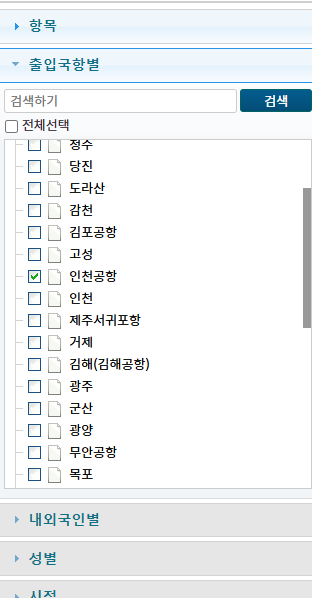

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [2]:
file_path="./ref/출입국항구내외국인성별국제이동연간_20250305.csv"
ori = pd.read_csv(file_path, encoding='EUC-KR')
ori.tail()

,출입국항별,내외국인별,성별,시점,항목,데이터
179,인천공항,외국인,여자,2021,출국자,112458
180,인천공항,외국인,여자,2022,입국자,172332
181,인천공항,외국인,여자,2022,출국자,106797
182,인천공항,외국인,여자,2023,입국자,181388
183,인천공항,외국인,여자,2023,출국자,130769


In [3]:
ex1_data = ori.copy()
ex1_data.columns = ["airport","type1","gender","year","type2","value"]  
#ex1_data.rename(columns={"",""})
ex1_data

,airport,type1,gender,year,type2,value
0,인천공항,내국인,남자,2001,입국자,70444
1,인천공항,내국인,남자,2001,출국자,96551
2,인천공항,내국인,남자,2002,입국자,101032
3,인천공항,내국인,남자,2002,출국자,124319
4,인천공항,내국인,남자,2003,입국자,102093
...,...,...,...,...,...,...
179,인천공항,외국인,여자,2021,출국자,112458
180,인천공항,외국인,여자,2022,입국자,172332
181,인천공항,외국인,여자,2022,출국자,106797
182,인천공항,외국인,여자,2023,입국자,181388


In [4]:
# 필터제작
filter1 = ex1_data['type1'] == '외국인'
ex2_data = ex1_data[filter1].copy()
ex2_data.head()

,airport,type1,gender,year,type2,value
92,인천공항,외국인,남자,2001,입국자,60699
93,인천공항,외국인,남자,2001,출국자,44548
94,인천공항,외국인,남자,2002,입국자,77745
95,인천공항,외국인,남자,2002,출국자,58784
96,인천공항,외국인,남자,2003,입국자,85643


In [5]:
ex1_data = ex1_data.groupby('year')['value'].sum().reset_index(name='total')
ex1_data.head()

,year,total
0,2001,521210
1,2002,697631
2,2003,747272
3,2004,769912
4,2005,991717


In [6]:
filter2 = ex2_data['type2'] == '입국자'
filter3 = ex2_data['type2'] == '출국자'

ex3_data = ex2_data[filter3]
ex2_data = ex2_data[filter2]

ex2_data = ex2_data.groupby('year')['value'].sum().reset_index(name = 'total')
ex3_data = ex3_data.groupby('year')['value'].sum().reset_index(name = 'total')

In [7]:
ex2_data.head()

,year,total
0,2001,108662
1,2002,135099
2,2003,140375
3,2004,149826
4,2005,214051


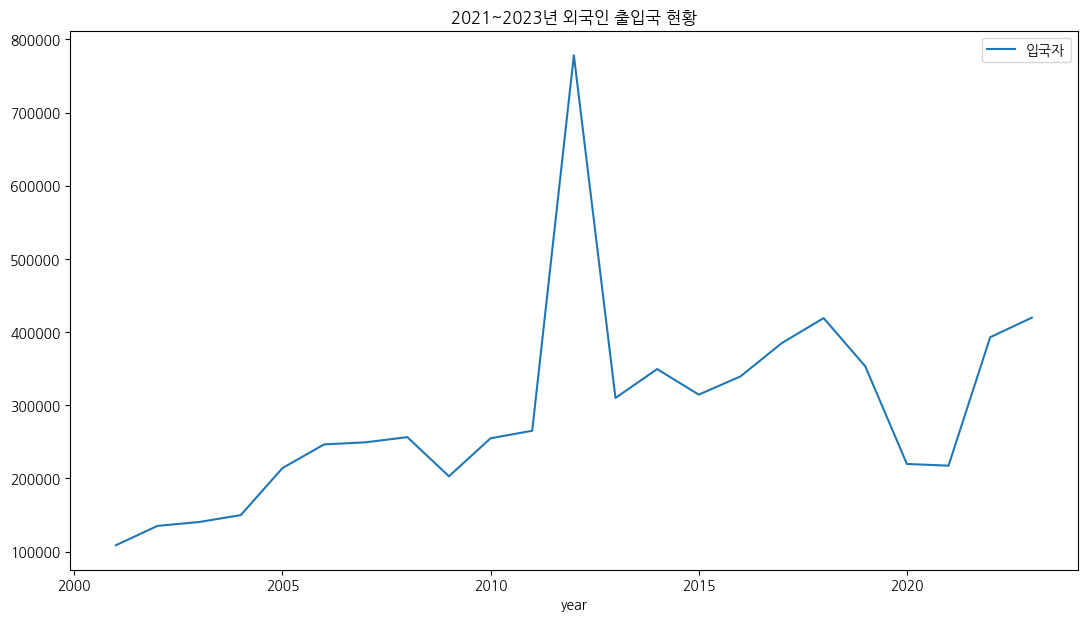

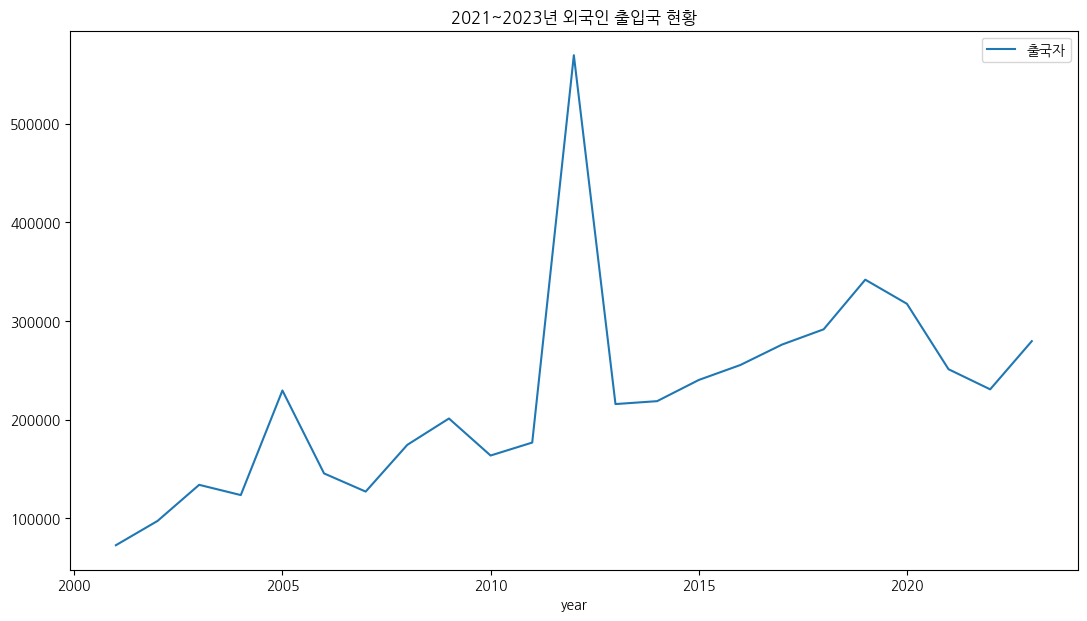

In [8]:
from matplotlib import rc
path = "C:\\Windows\\Fonts\\NanumGothic.ttf"
font_name = fm.FontProperties(fname=path).get_name()
rc('font',family=font_name)


ex2_data.plot(x='year',y='total',label='입국자',figsize=(13,7),title="2021~2023년 외국인 출입국 현황")
ex3_data.plot(x='year',y='total',label='출국자',figsize=(13,7),title="2021~2023년 외국인 출입국 현황")
plt.show()

In [9]:
# !pip install prophet
# !pip install --upgrade plotly
# !pip install tqdm
# !pip install --upgrade jupyter ipywidgets

In [10]:
from prophet import Prophet

In [11]:
# 페이스북에서는 time(year)을 ds, value는 y를 사용하므로 전처리 해준다.
ex1_data['year'] = pd.to_datetime(ex1_data['year'], format ="%Y")
ex4_data = ex1_data.rename(columns={'year':'ds','total':'y'})
ex4_data.head()

,ds,y
0,2001-01-01,521210
1,2002-01-01,697631
2,2003-01-01,747272
3,2004-01-01,769912
4,2005-01-01,991717


In [12]:
m = Prophet()
m.fit(ex4_data)

12:22:34 - cmdstanpy - INFO - Chain [1] start processing
12:22:34 - cmdstanpy - INFO - Chain [1] done processing


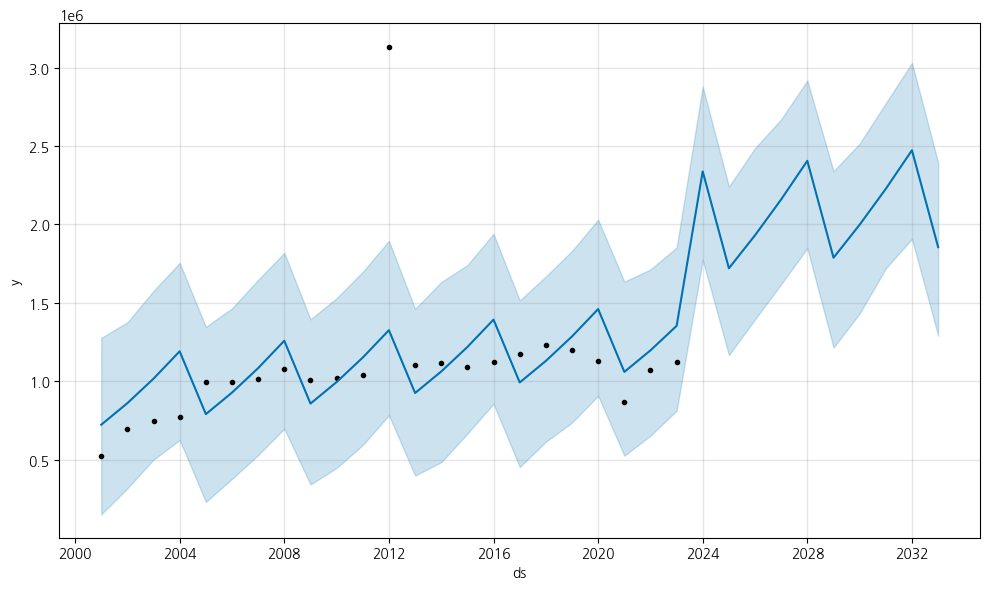

In [13]:
future = m.make_future_dataframe(periods=10, freq='YE') #10년후까지의 데이터 예측
forecast = m.predict(future)
fig1 = m.plot(forecast)
plt.show()

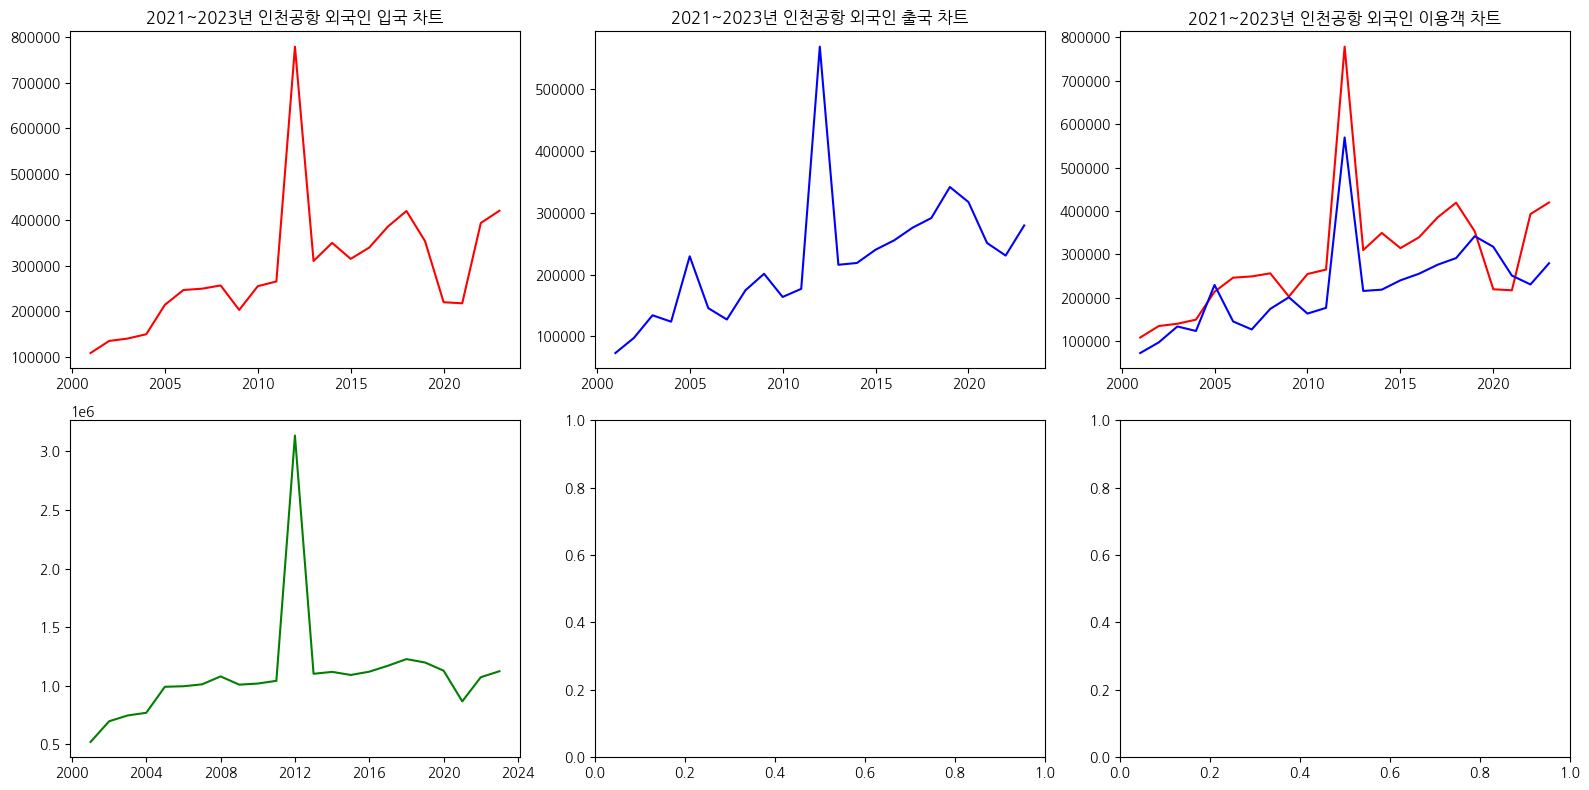

In [41]:
fig, axs = plt.subplots(2,3, figsize=(16,8))

axs[0,0].plot(ex2_data['year'],ex2_data['total'], color ='r')
axs[0,1].plot(ex3_data['year'],ex3_data['total'], color ='b')
axs[0,2].plot(ex2_data['year'],ex2_data['total'], label ='출국자', color ='r')
axs[0,2].plot(ex3_data['year'],ex3_data['total'], label ='입국자',  color ='b')
axs[1,0].plot(ex4_data['ds'],ex4_data['y'], label = 'total', color ='g')


axs[0,0].set_title('2021~2023년 인천공항 외국인 입국 차트')
axs[0,1].set_title('2021~2023년 인천공항 외국인 출국 차트')
axs[0,2].set_title('2021~2023년 인천공항 외국인 이용객 차트')

plt.tight_layout()
plt.show()

In [143]:
gen_data = ori.copy()

In [144]:
gen_data.columns = ["airport","type1","gender","year","type2","value"] #column 변경

In [147]:
gen_data = gen_data.groupby(['year','gender','type2'])['value'].sum().reset_index(name='total') #year, gender, type2 제외하고 통합
gen_data.head()

KeyError: 'Column not found: value'

In [114]:
filter_m = gen_data['gender'] == '남자'  # 남성만
filter_f = gen_data['gender'] == '여자'  # 여성만
m_data = gen_data[filter_m]
f_data = gen_data[filter_f]

# 입국, 출국 구분
in_m_data = m_data[m_data['type2'] == '입국자']
out_m_data = m_data[m_data['type2'] == '출국자']
in_f_data = f_data[f_data['type2'] == '입국자']
out_f_data = f_data[f_data['type2'] == '출국자']

In [115]:
total_f_data = f_data.groupby('year').sum().reset_index()
total_m_data = m_data.groupby('year').sum().reset_index()

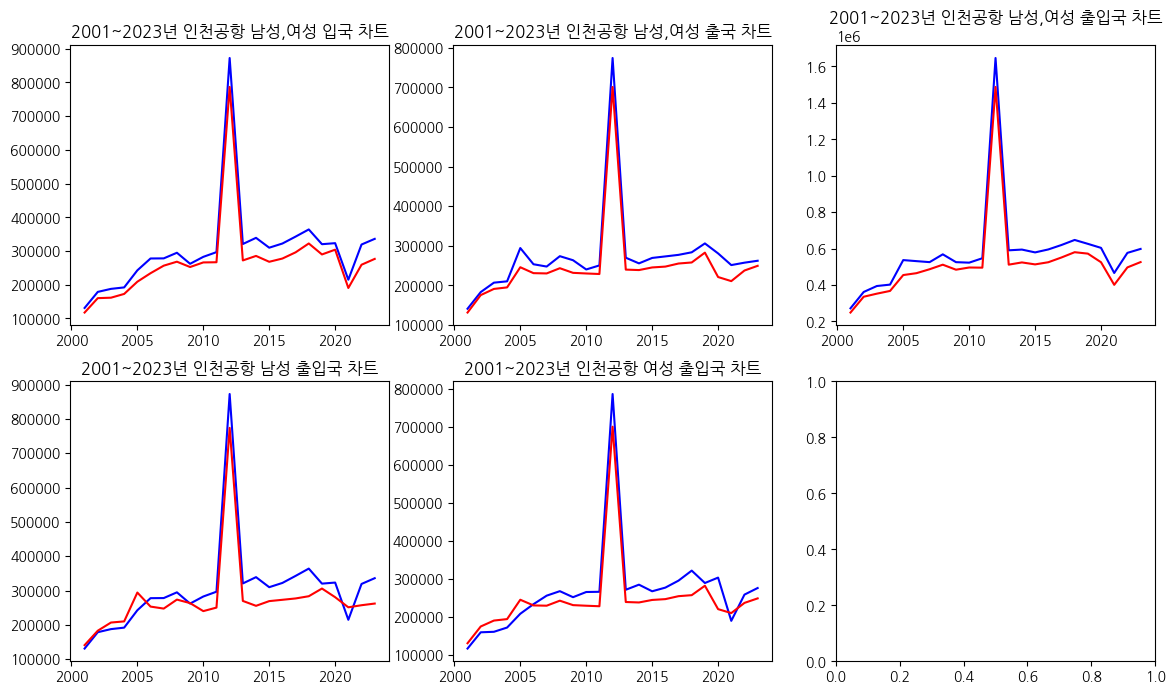

In [146]:
fig, axs = plt.subplots(2,3, figsize=(14,8))

axs[0,0].plot(in_m_data['year'], in_m_data['total'], label ='남성', color ='b')
axs[0,0].plot(in_f_data['year'], in_f_data['total'], label ='여성', color ='r')
axs[0,1].plot(out_m_data['year'], out_m_data['total'], color ='b')
axs[0,1].plot(out_f_data['year'],out_f_data['total'], color ='r')
axs[0,2].plot(total_m_data['year'],total_m_data['total'], color ='b')
axs[0,2].plot(total_f_data['year'],total_f_data['total'], color ='r')
axs[1,0].plot(in_m_data['year'], in_m_data['total'], color ='b')
axs[1,0].plot(out_m_data['year'], out_m_data['total'], color ='r')
axs[1,1].plot(in_f_data['year'], in_f_data['total'], color ='b')
axs[1,1].plot(out_f_data['year'], out_f_data['total'], color ='r')


axs[0,0].set_title('2001~2023년 인천공항 남성,여성 입국 차트')
axs[0,1].set_title('2001~2023년 인천공항 남성,여성 출국 차트')
axs[0,2].set_title('2001~2023년 인천공항 남성,여성 출입국 차트')
axs[1,0].set_title('2001~2023년 인천공항 남성 출입국 차트')
axs[1,1].set_title('2001~2023년 인천공항 여성 출입국 차트')

plt.show()

2021년부터 2023년까지 인천공항을 기준으로 남성과 여성 대상 이용자수 분석 차트이다.

모든 차트에서 2012년도에 가장 높은 이용자수를 보이며, 코로나 시기였던 2021년도에 가장 낮은 이용자수를 보인다.<br>
남성과 여성을 비교하여 분석했을 때 모든 년도에서 남성이 여성보다 이용자수가 비약적으로 많은것으로 보여진다. <br>
남성, 여성 모두 대부분의 년도에서 입국자수가 출국자수보다 비약적으로 높았으나, 2005년 이전, 그리고 코로나 시기인 2021년도는 입국자수가 출국자수에 비해 더 적은것으로 보여진다.